<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
import geopandas
import geoplot
import mapclassify


## Exploring your data

### Read cleaned data from file (0.25 points)

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
cleaned_df = pd.read_csv("../data/processed/21127635_americas_processed.csv")

In [3]:
# TEST
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
0,93763.0,48981.0,44782.0,18.184992,6.828165,11.0,20.153997,17.004881,8.655858,11.81121,...,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,Antigua and Barbuda
1,93219.0,48708.0,44511.0,12.115000,6.365000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.720000,63.452255,75.77500,80.94100,106.128710,39.528947,95.522408,97.105964,2021,Antigua and Barbuda
2,92664.0,48428.0,44236.0,12.160000,5.961000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.740000,63.452255,76.06100,81.31600,106.128710,39.528947,95.522408,97.105964,2020,Antigua and Barbuda
3,92117.0,48156.0,43961.0,11.485000,5.865000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.690000,63.452255,75.90900,81.17100,112.122238,39.528947,104.976669,97.105964,2019,Antigua and Barbuda
4,91626.0,47911.0,43715.0,10.816000,5.787000,11.0,20.153997,17.004881,8.655858,11.81121,...,0.700000,63.452255,75.72400,81.00000,112.091682,39.528947,104.444443,97.105964,2018,Antigua and Barbuda


In [4]:
# TEST
cleaned_df.shape

(1204, 26)

### Numerical analysis using descriptive statistics (0.25 points)

Descriptive statistics show the characteristics of numerical features. It shows us the information such as:
- The mean (and you can go further with advanced techiques as Arithmetic mean, Geometric mean, Harmonic mean)
- The median
- The mode
- Quantiles (Quartiles, Percentiles, Deciles, Crocodiles?)
- Range and IQR (Interquartile Range) (you might find that its relation to box plots)
- Variance and Standard deviation (std dev)
- Coefficient of Variation
- Skewness
- Kurtosis
- Standard Error (of the sample mean)
- Moments
- Covariance and Correlation

Due the scope of this lab, you just need to use basic function of Pandas to calculate basic descriptive statistics information and give insights from it.

In [5]:
df_copy = cleaned_df.drop(['Year', 'Country'], axis='columns')

# YOUR CODE HERE
df_copy.describe()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Agriculture value added(in USD),Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate
count,1.204000e+03,1.204000e+03,1.204000e+03,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,...,1.204000e+03,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000
mean,2.126095e+07,1.075849e+07,1.050246e+07,18.184992,6.828165,10.879921,20.153997,17.004881,8.655858,11.811210,...,9.465944e+09,2620.246216,21.149982,63.452255,70.198520,76.072760,106.128710,39.528947,95.522408,97.105964
std,5.505953e+07,2.791240e+07,2.714762e+07,5.728701,1.721987,2.510386,3.128110,10.185105,7.958425,3.870891,...,2.610442e+10,2439.693577,19.897091,17.863313,4.207327,4.345992,7.355744,16.324976,8.274955,1.669140
min,1.510100e+04,7.336000e+03,7.765000e+03,5.900000,2.800000,6.000000,10.386770,1.128129,0.094002,3.099745,...,3.486034e+05,23.915832,0.000000,0.000000,45.758000,46.251000,72.597130,0.117370,46.638149,72.346718
25%,1.091660e+05,5.645700e+04,5.554250e+04,13.767000,5.590250,9.000000,18.713608,10.670777,3.891058,9.503683,...,1.035674e+08,1868.859189,5.245000,63.452255,68.190750,74.094250,102.377203,37.783577,95.522408,97.105964
50%,3.422497e+06,1.764235e+06,1.658096e+06,17.602500,6.828165,11.000000,20.153997,17.004881,8.310724,11.811210,...,1.505479e+09,2620.246216,16.665000,63.452255,70.198520,76.225000,106.128710,39.528947,95.522408,97.105964
75%,1.194908e+07,5.975354e+06,5.995499e+06,22.027250,7.836750,12.000000,21.871533,19.691680,8.655858,12.415630,...,9.465944e+09,2620.246216,31.440000,69.753488,72.992500,78.855500,109.840109,39.528947,97.884462,97.105964
max,3.332876e+08,1.682662e+08,1.650213e+08,37.349000,17.738000,17.000000,32.266680,52.982150,42.189880,27.820870,...,2.237237e+11,17264.736744,86.990000,99.929949,80.621000,85.855000,148.712952,117.719940,152.806656,100.000000


**TODO**: Give your obervation here

...

...

### Describe the correlation between features in the dataset (0.75 points)

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal. By using calculation and visualisation, Python allows us to create a correlation matrix, which is a table that represents the correlation coefficients between different variables.

Now let's make a correlation matrix, then visualize it, and describe what insights you observed?

In [6]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

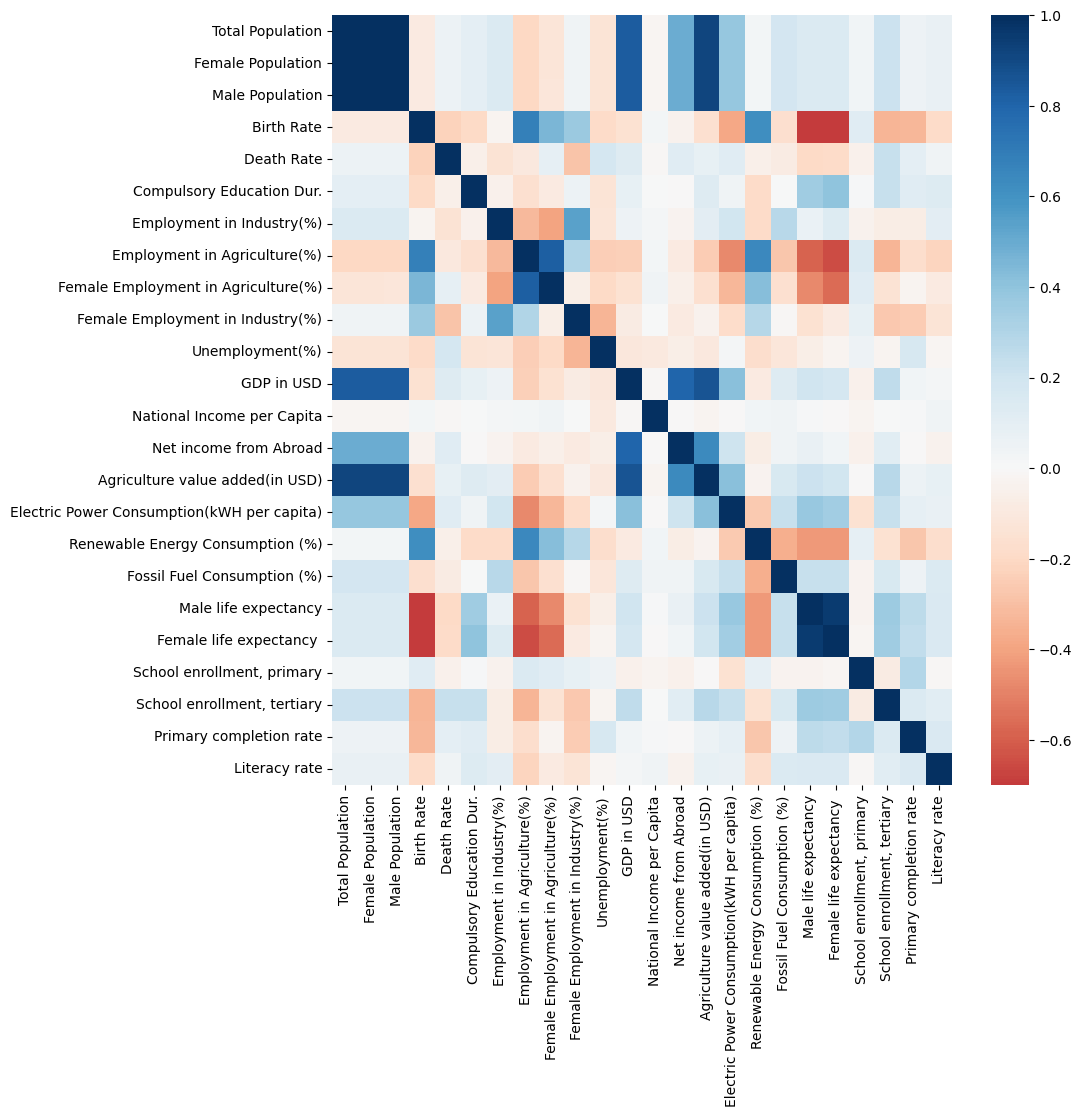

In [7]:
# YOUR CODE HERE
# create a copy
df_copy = cleaned_df.copy()

# Exclude the categorical features from the matrix
df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**Question 01**: How does the correlation between features change in the top 10 countries with the LARGEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is large.

In [8]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)

      Total Population  Female Population  Male Population  Birth Rate  \
1092       333287557.0        168266218.0      165021339.0   18.184992   
224        215313498.0        109580471.0      105733027.0   18.184992   
756        127504125.0         65309171.0       62194954.0   18.184992   
364         51874024.0         26298417.0       25575607.0   18.184992   
28          46234830.0         23345532.0       22889298.0   18.184992   
280         38929902.0         19583243.0       19346659.0   18.184992   
868         34049588.0         17192502.0       16857086.0   18.184992   
1154        30741464.0         15457477.0       15283987.0   18.898000   
336         19603733.0          9874202.0        9729531.0   18.184992   
504         18001000.0          9016398.0        8984602.0   18.184992   

      Death Rate  Compulsory Education Dur.  Employment in Industry(%)  \
1092    6.828165                       12.0                  20.153997   
224     6.828165                     

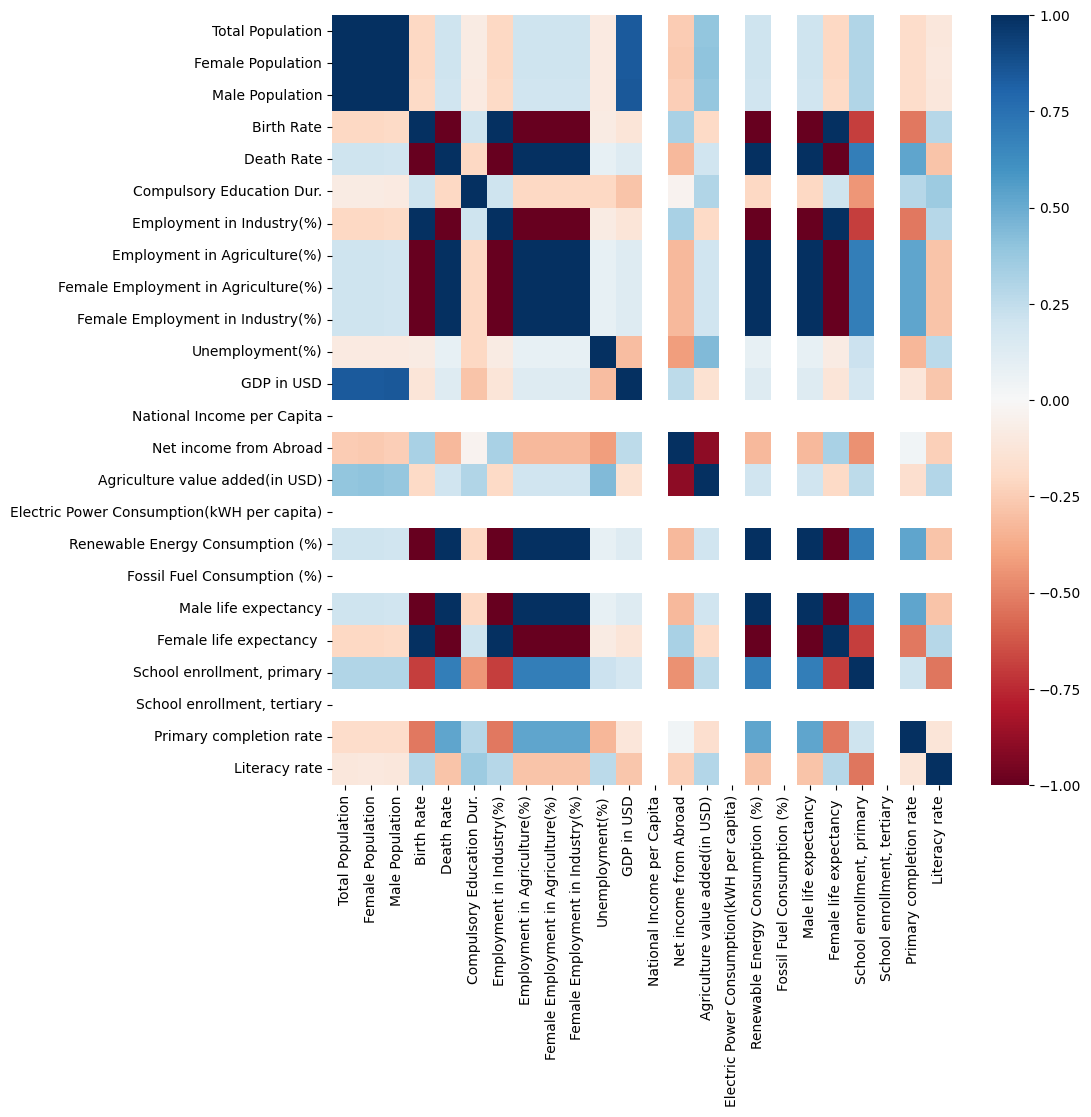

In [9]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()
df_sorted = df_copy.sort_values(by='Total Population', ascending=False)

# Lấy 5 quốc gia có dân số lớn nhất
top10 = df_sorted['Country'].unique()[:10]
# Tạo DataFrame con cho 5 quốc gia này
top_10_countries = df_sorted[df_sorted['Country'].isin(top10)].drop_duplicates(subset='Country')
top_10_countries.drop(['Year', 'Country'], inplace=True, axis='columns')
print(top_10_countries)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_10_countries.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()
# country_populations = df_copy.groupby('Country')['Total Population']
# country_populations
# sorted_data = df_copy.sort_values(by='Total Population', ascending=False)
# top_10_countries = sorted_data.head(10)
# top_10_countries
# top_10_countries.drop(['Year', 'Country'], inplace=True, axis='columns')
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(top_10_countries.corr(), cmap='RdBu', center=0,ax=ax)
# plt.show()
# Exclude the categorical features from the matrix
# df_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

**YOUR ANSWER**

**Question 02**: How does the correlation between features change in the top 10 countries with the SMALLEST population?

When we have an answer for this question, we might see how features interaction with each other when the conutry population is small.

In [10]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

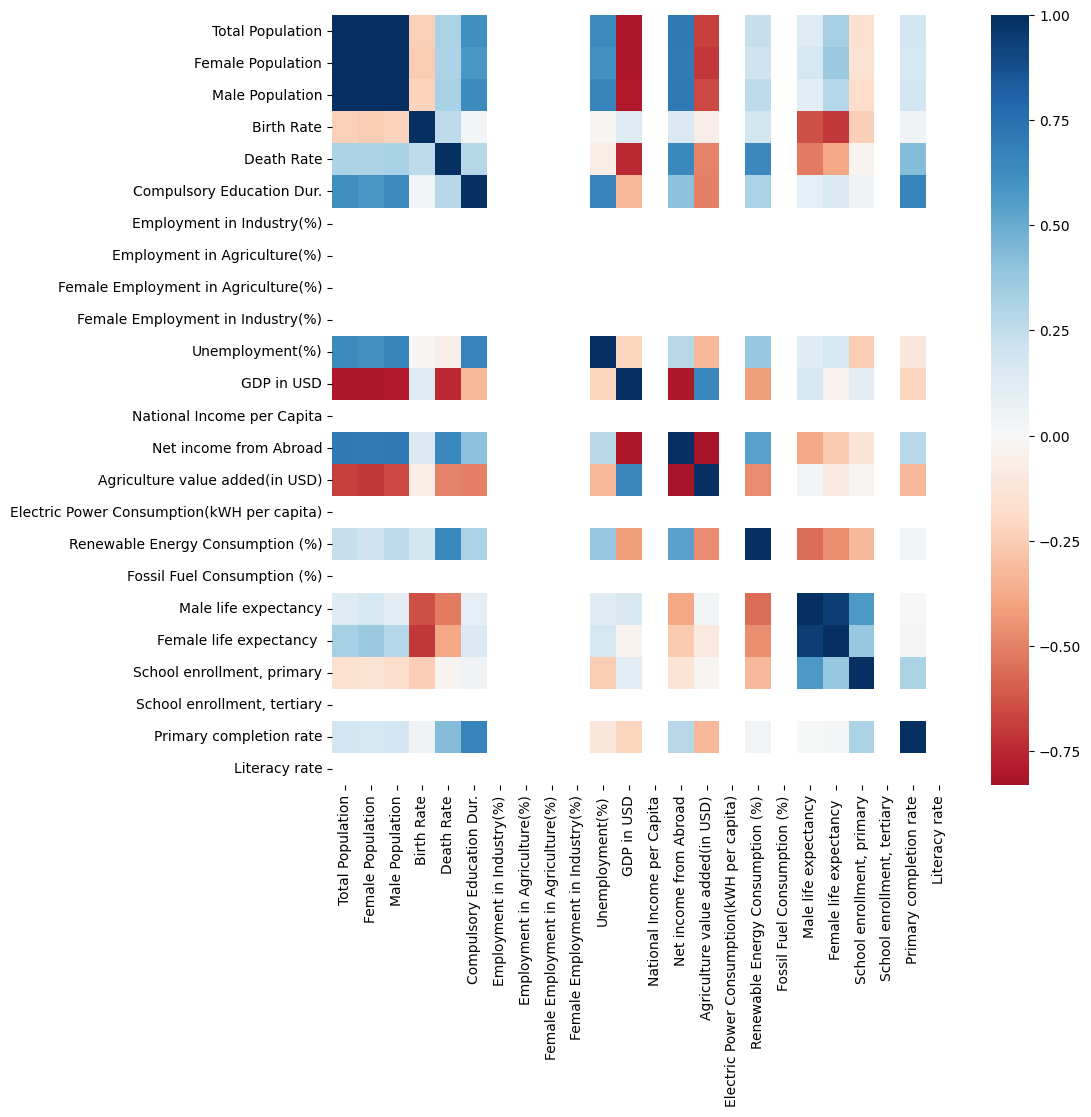

In [11]:
# YOUR CODE HERE
df_copy = cleaned_df.copy()
df_sorted = df_copy.sort_values(by='Total Population', ascending=True)

# Lấy 5 quốc gia có dân số lớn nhất
top10 = df_sorted['Country'].unique()[:10]
# Tạo DataFrame con cho 5 quốc gia này
top_10_countries = df_sorted[df_sorted['Country'].isin(top10)].drop_duplicates(subset='Country')
top_10_countries.drop(['Year', 'Country'], inplace=True, axis='columns')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_10_countries.corr(), cmap='RdBu', center=0,ax=ax)
plt.show()

**YOUR ANSWER**

Example: Is that possible to drop any features that have less effect?

## Making a question 2? (1.25 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** What is the population situation of the countries on the continent today?

**Answering this question will** help us to see the current population status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Birth Rate and Death Rate for countries across all the year.

### Pre-processing

In [12]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

Step 01: construct Average Birth Rate dataframe for each country.

In [13]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_birthrate_df["Avg.Birth Rate"] = cleaned_df.groupby("Country")["Birth Rate"].mean()

# Set the index as a column - countries
avg_birthrate_df["Country"] = avg_birthrate_df.index

# Drop the index
avg_birthrate_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_birthrate_df.sort_values("Avg.Birth Rate", inplace=True, ascending=False)

# Display
avg_birthrate_df

,Avg.Birth Rate,Country
22,28.940357,Guatemala
24,27.961714,Haiti
25,27.421750,Honduras
7,26.289464,Bolivia
5,24.881107,Belize
28,24.790643,Nicaragua
30,24.082678,Paraguay
23,22.955464,Guyana
17,22.260000,Dominican Republic
18,21.991000,Ecuador


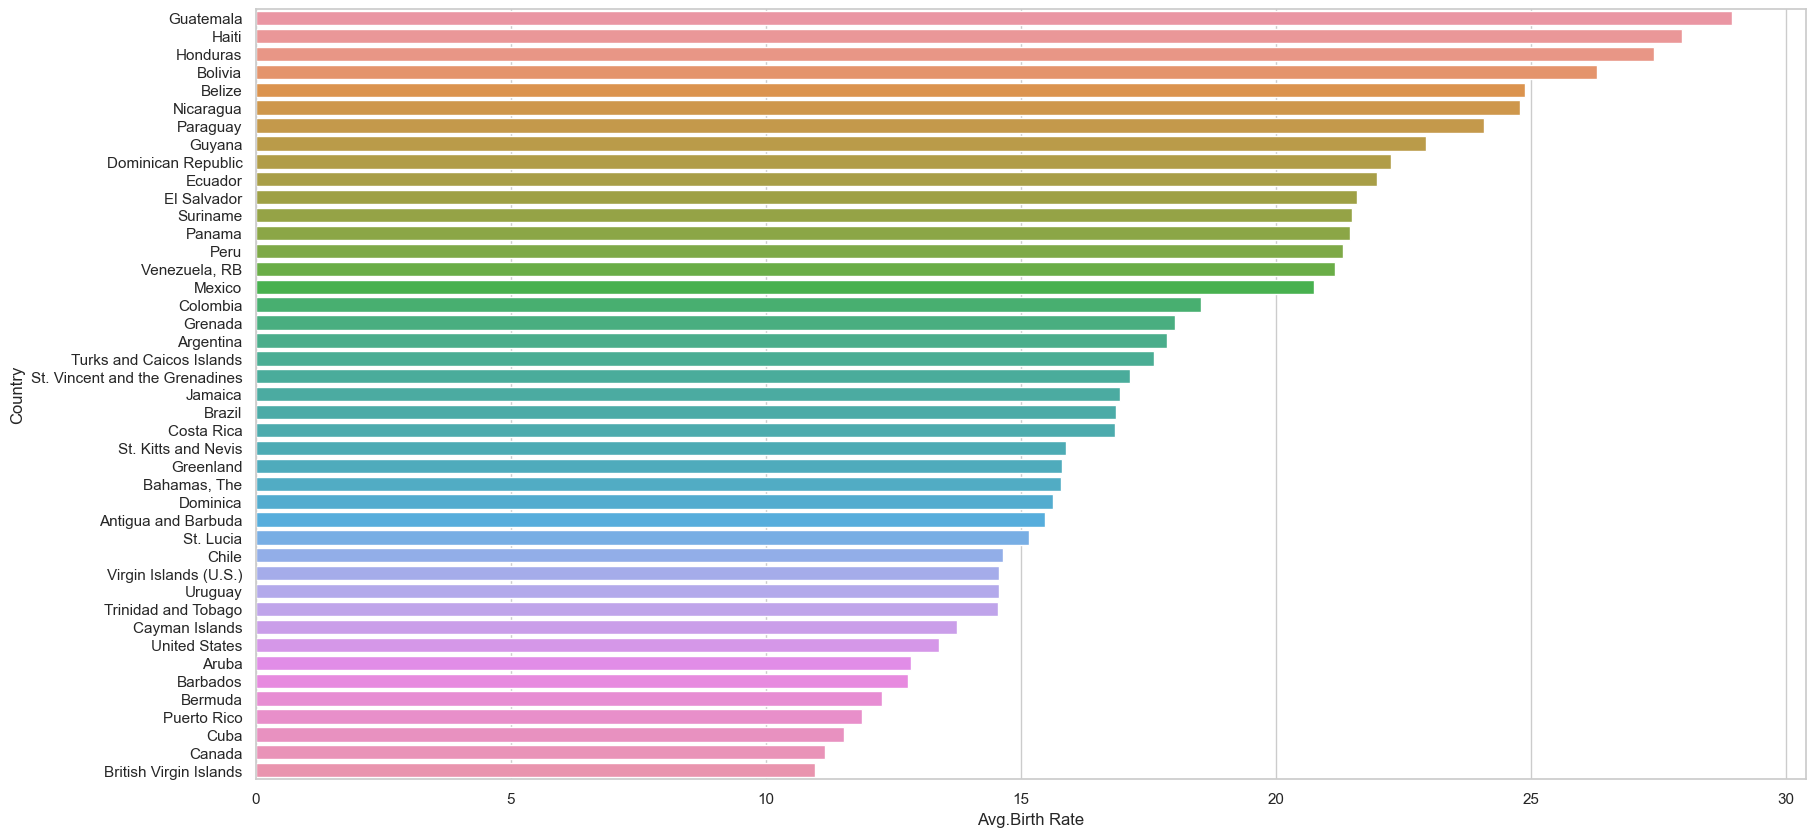

In [14]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_birthrate_df, y="Country", x= "Avg.Birth Rate")

Step 02: construct Average Death Rate dataframe for each country.

In [15]:
# Create a new dataframe
avg_deathrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_deathrate_df ["Avg.Death Rate"] = cleaned_df.groupby("Country")["Death Rate"].mean()

# Set the index as a column - countries
avg_deathrate_df["Country"] = avg_deathrate_df .index

# Drop the index
avg_deathrate_df .reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_deathrate_df .sort_values("Avg.Death Rate", inplace=True, ascending=False)

# Display
avg_deathrate_df 

,Avg.Death Rate,Country
16,10.081113,Dominica
24,9.555292,Haiti
40,9.377899,Uruguay
33,9.339327,St. Kitts and Nevis
4,9.075256,Barbados
7,8.499827,Bolivia
39,8.467827,United States
15,8.423113,Cuba
20,8.304577,Greenland
32,8.001220,Puerto Rico


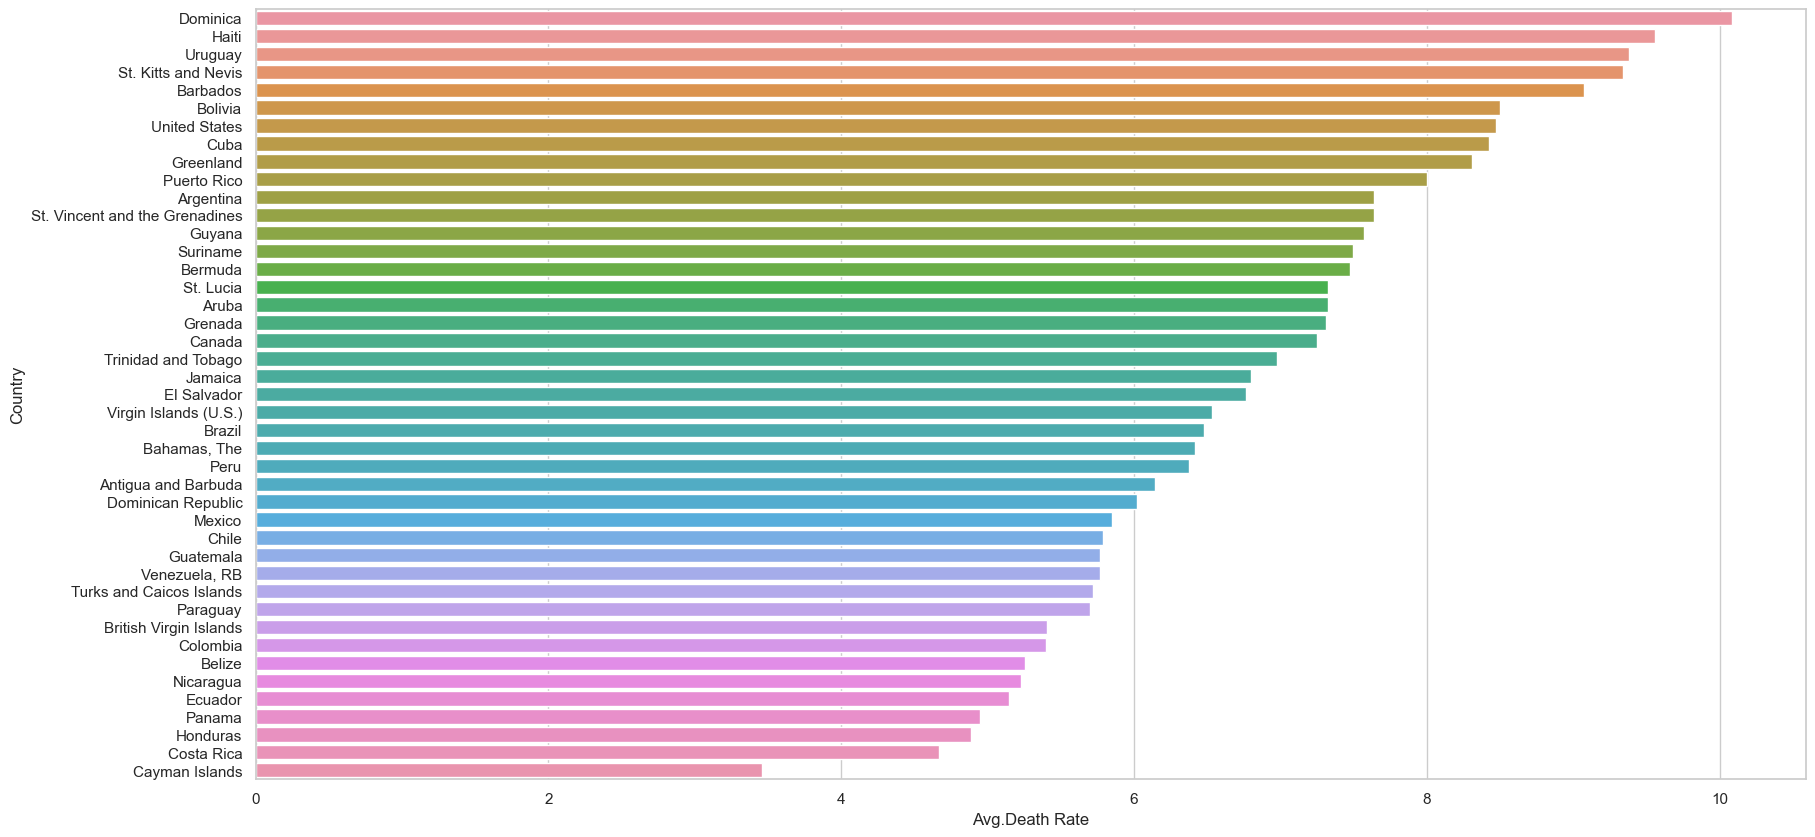

In [16]:
# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_deathrate_df, y="Country", x= "Avg.Death Rate")

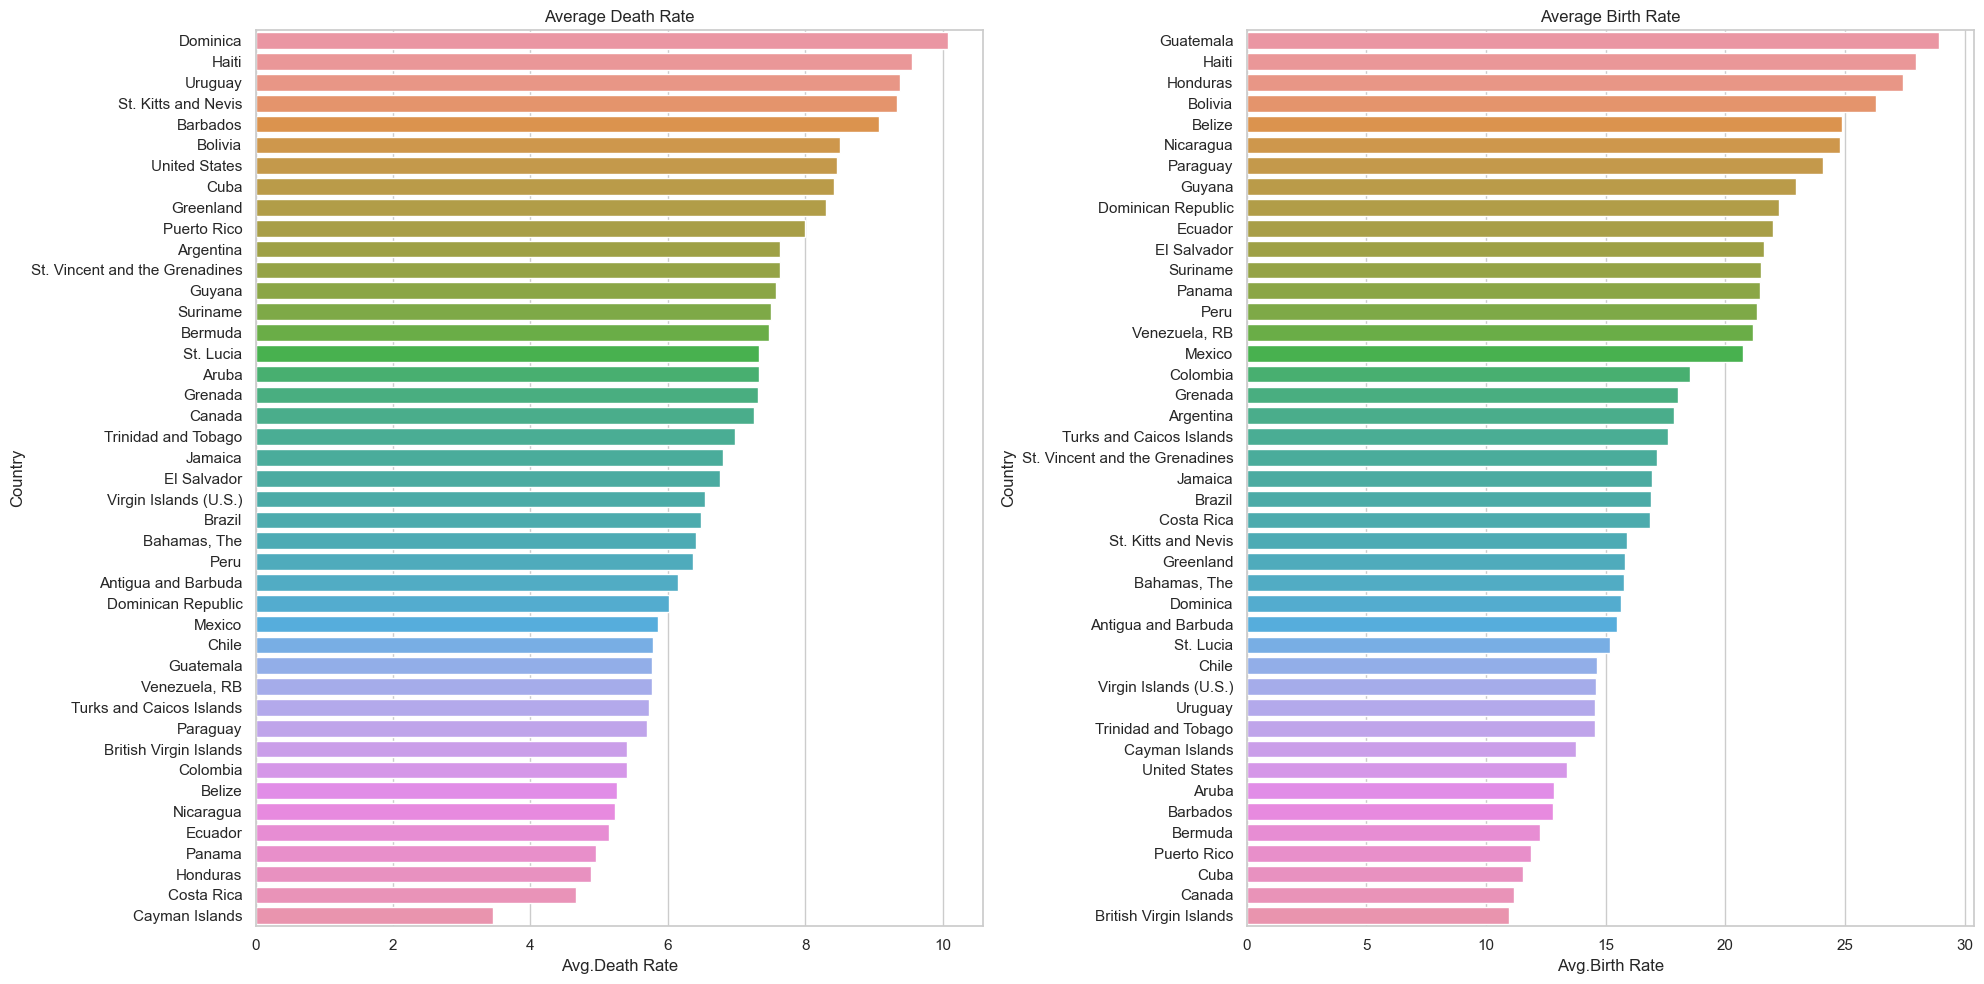

In [17]:
#Show 2 bar charts into 1 figures -> easy to compare
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Bar chart for Avg Death Rate
sns.set(style="whitegrid")
sns.barplot(data=avg_deathrate_df, y="Country", x="Avg.Death Rate", ax=ax1)
ax1.set_title("Average Death Rate")

# Bar chart for Avg Birth Rate
sns.set(style="whitegrid")
sns.barplot(data=avg_birthrate_df, y="Country", x="Avg.Birth Rate", ax=ax2)
ax2.set_title("Average Birth Rate")

# Display the figure
plt.tight_layout()
plt.show()


**TODO**: Give your obervation here

...

...

## Making your own question 03? (1.5 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** Are there any countries where the female population is larger than the male population?

**Answering this question will** help us to see the current population between male and female status and predictions about the future development of the labor force of the countries on the continent are under consideration.

**How we answer this question**: we will consider the Average Male Population and Average FeMale Population for countries across all the year.

**YOUR ANSWER HERE**

### Analyzing to get the answer

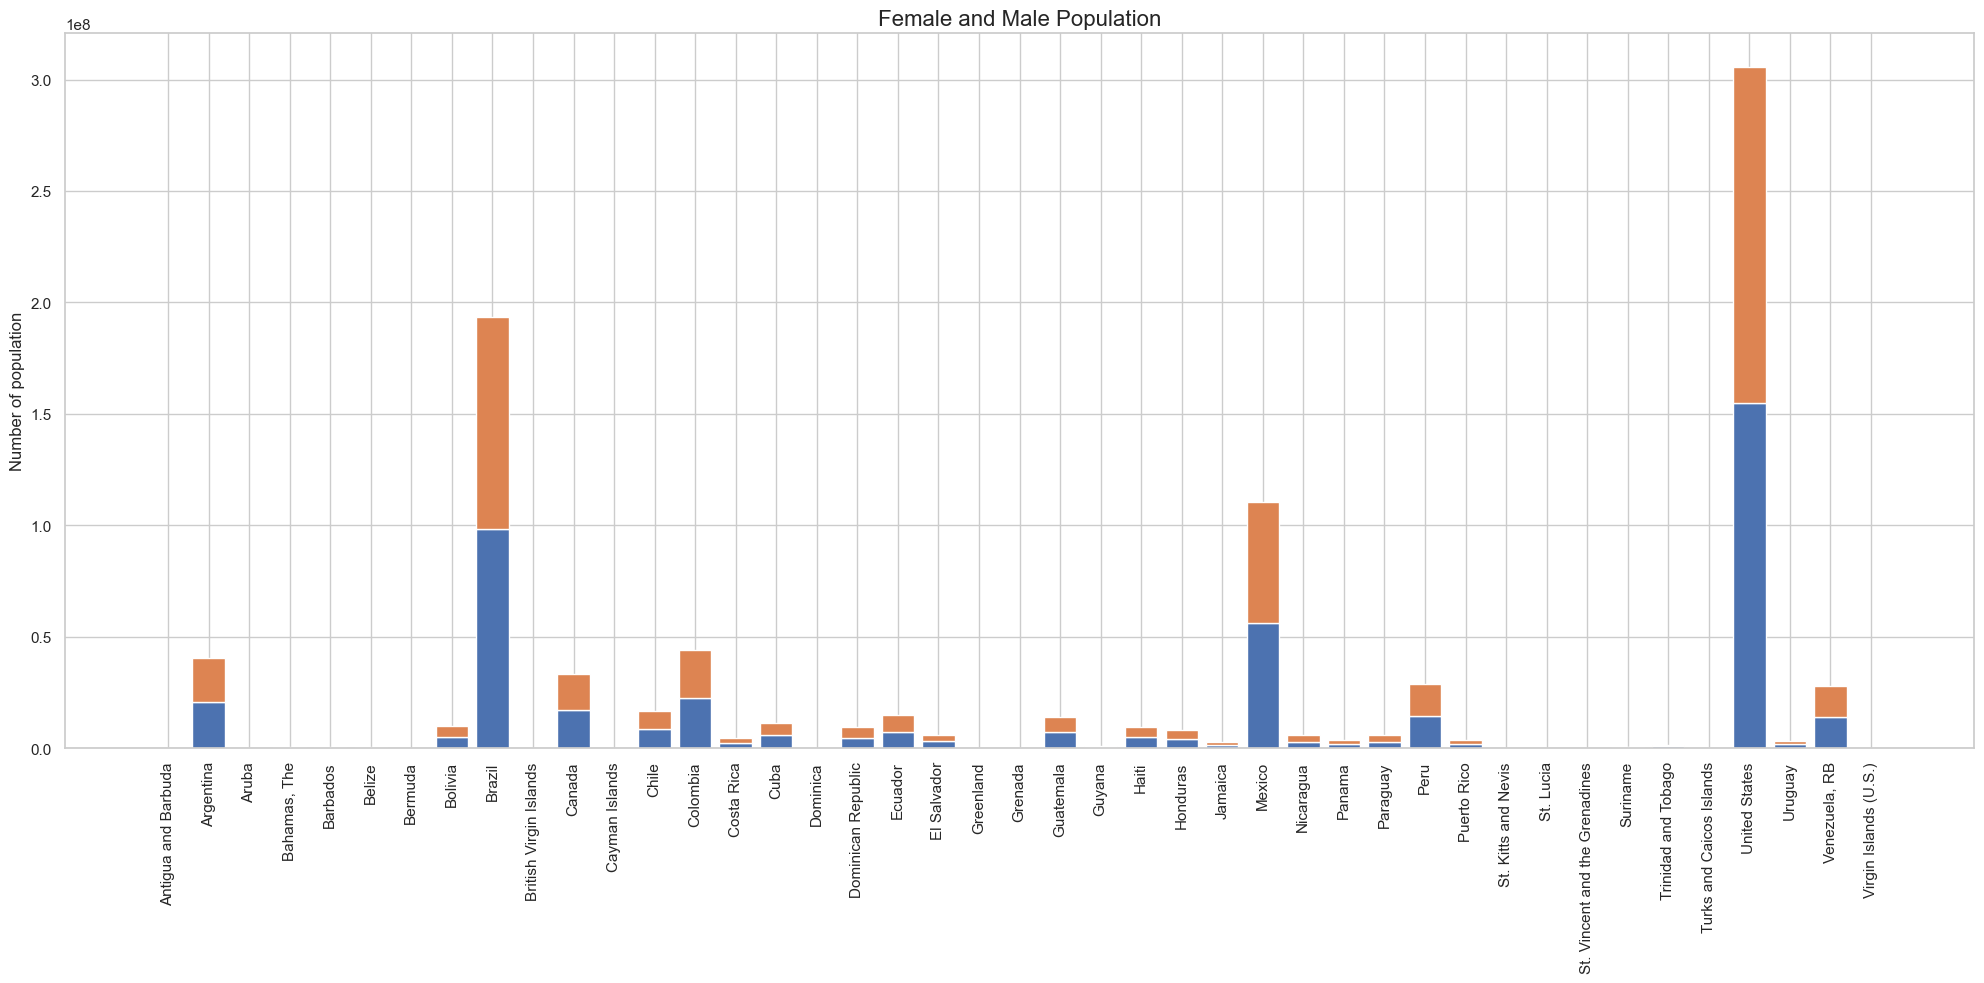

In [18]:

# YOUR CODE HERE
avgGenderPopulation = pd.DataFrame()
avgGenderPopulation["Avg.Female Population"] = cleaned_df.groupby("Country")["Female Population"].median()
avgGenderPopulation["Avg.Male Population"] = cleaned_df.groupby("Country")["Male Population"].median()
avgGenderPopulation["Country"] = avgGenderPopulation.index
avgGenderPopulation.reset_index(drop=True, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
plt.bar(avgGenderPopulation['Country'], avgGenderPopulation['Avg.Female Population'], label='Avg.Female Population')
plt.bar(avgGenderPopulation['Country'], avgGenderPopulation['Avg.Male Population'], label='Avg.Male Population', bottom=avgGenderPopulation['Avg.Female Population'])
plt.title('Female and Male Population', fontsize=16)
plt.xticks(rotation =90)
plt.ylabel('Number of population',fontsize=12)
plt.tight_layout()
plt.show()


As you can see, population of "United States", "Brazil", "Mexico", "Colombia", "Argentina", "Canada", "Venezuela, RB","Peru","Chile","Ecuador" are bigger than other. So I decide to separate these countries into other chart to easy visualization. 

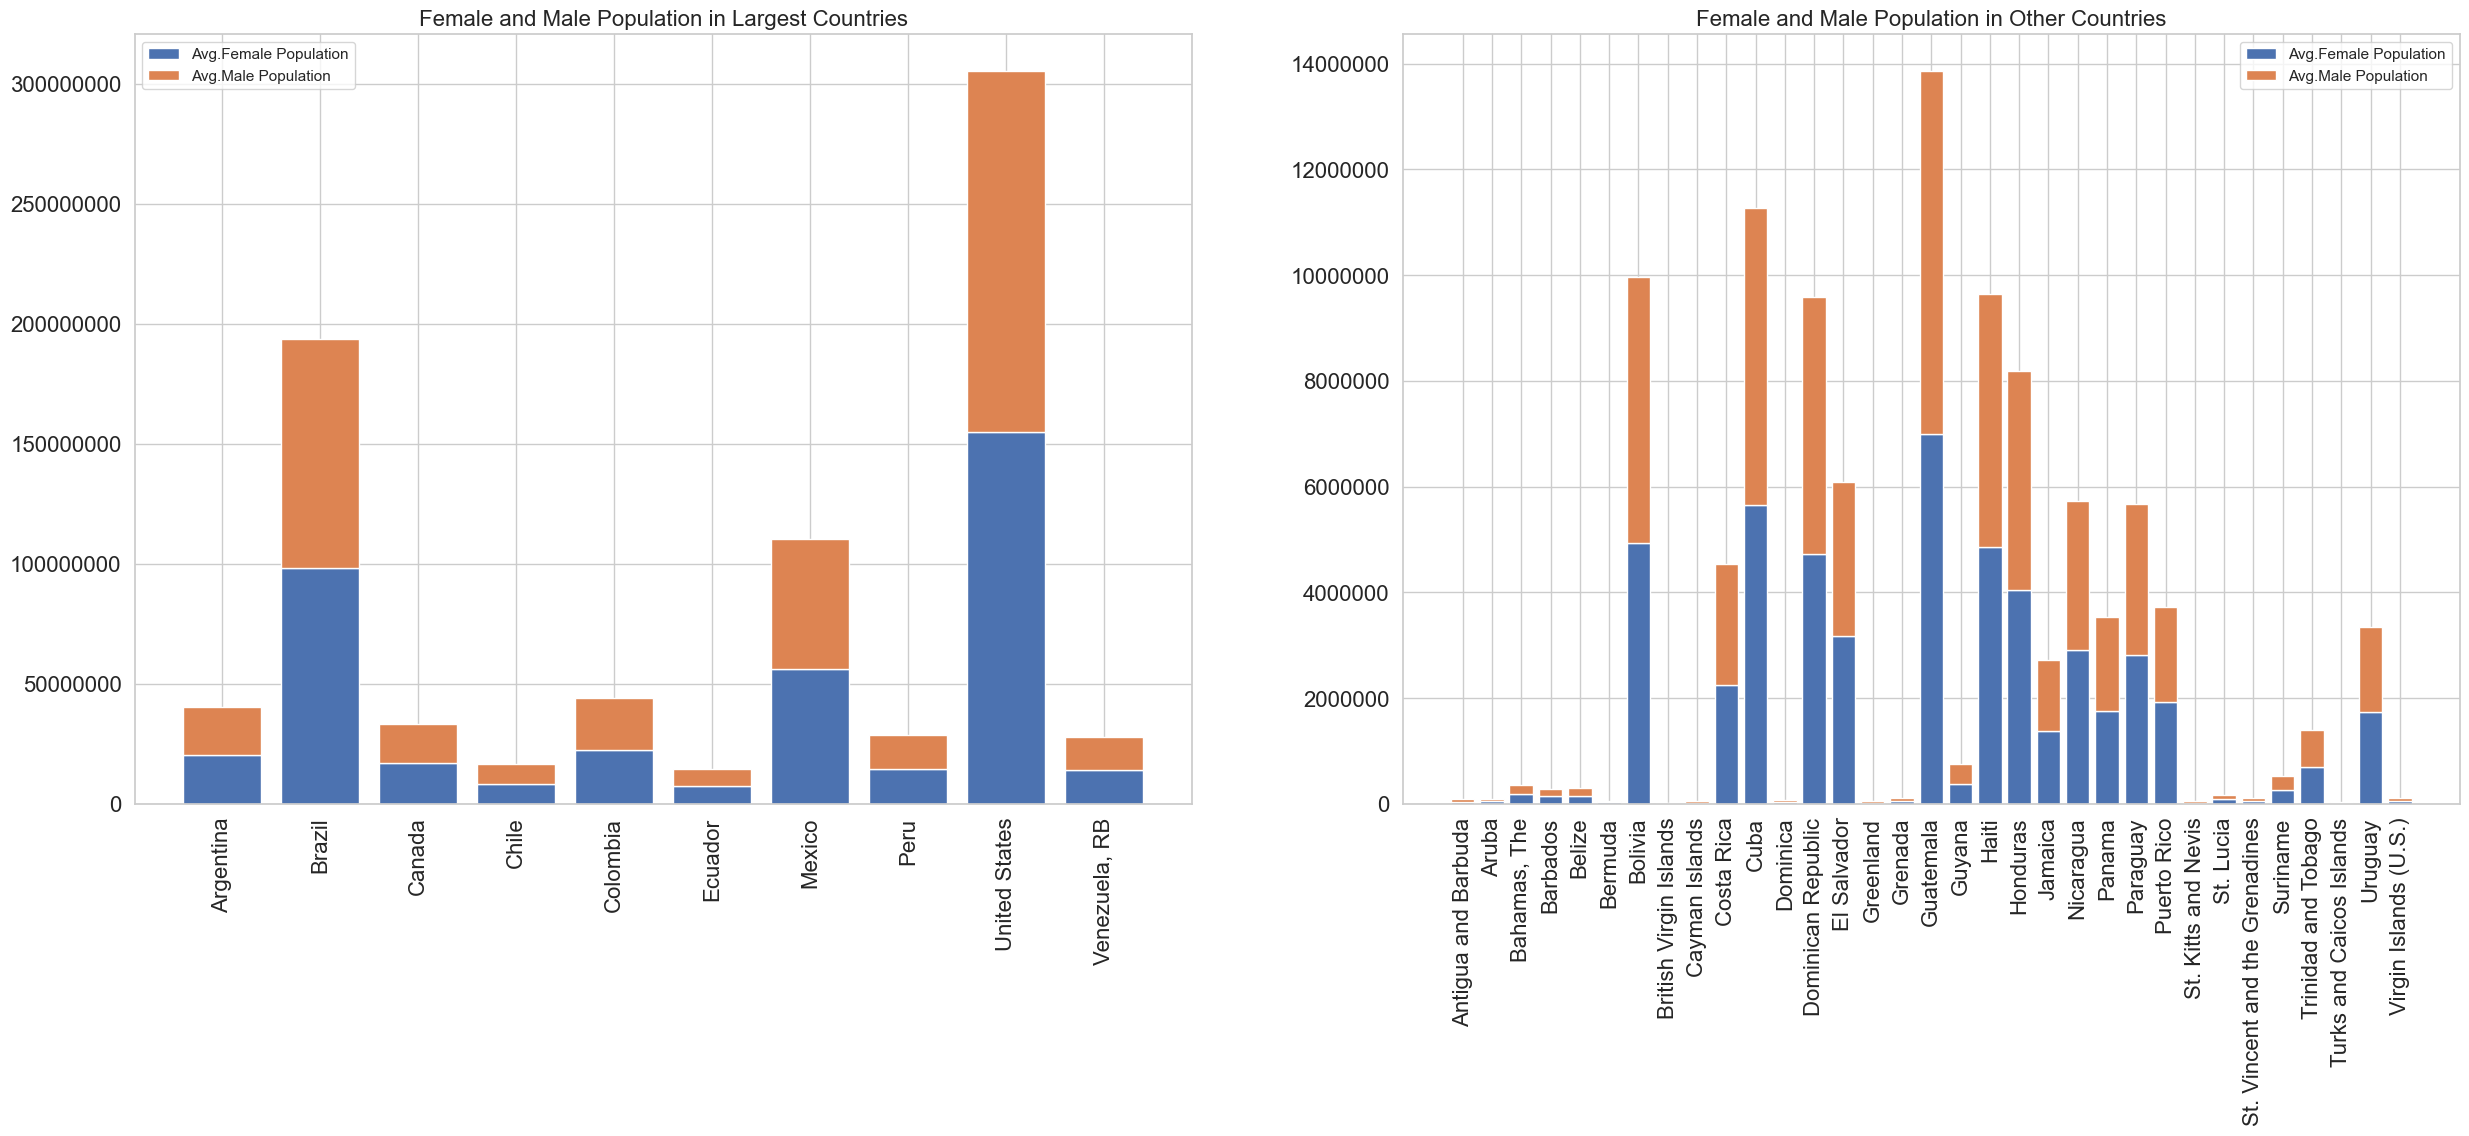

In [19]:
LargestCountries = ["United States", "Brazil", "Mexico", "Colombia", "Argentina", "Canada", "Venezuela, RB","Peru","Chile","Ecuador"]
avgGenderPopulation
avgGPLargestCountries = avgGenderPopulation[avgGenderPopulation["Country"].isin(LargestCountries)]
avgGPother = avgGenderPopulation[~avgGenderPopulation["Country"].isin(LargestCountries)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.bar(avgGPLargestCountries['Country'], avgGPLargestCountries['Avg.Female Population'], label='Avg.Female Population')
ax1.bar(avgGPLargestCountries['Country'], avgGPLargestCountries['Avg.Male Population'], label='Avg.Male Population', bottom=avgGPLargestCountries['Avg.Female Population'])
ax1.set_title('Female and Male Population in Largest Countries', fontsize=16)
ax1.set_xticklabels(avgGPLargestCountries['Country'],rotation = 90,fontsize = 16)
ax1.tick_params(axis='y', labelsize=16)
ax1.ticklabel_format(axis='y', style='plain')
ax1.legend()

ax2.bar(avgGPother['Country'], avgGPother['Avg.Female Population'], label='Avg.Female Population')
ax2.bar(avgGPother['Country'], avgGPother['Avg.Male Population'], label='Avg.Male Population', bottom=avgGPother['Avg.Female Population'])
ax2.set_title('Female and Male Population in Other Countries', fontsize=16)
ax2.set_xticklabels(avgGPother['Country'],rotation = 90,fontsize = 16)
ax2.tick_params(axis='y', labelsize=16)
ax2.ticklabel_format(axis='y', style='plain')
ax2.legend()
plt.show()

***Result: After visualization, we can see that there is no gender balance among countries.***

## Making your own question 04? (1.5 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:** Are there differences in the distribution of employment in industry and agriculture between male and female populations in various countries?

**Answering this question will**:provide insights into gender disparities in employment across various countries. It will help us understand whether there are variations in the distribution of employment in industry and agriculture between males and females. This knowledge can inform policies and initiatives aimed at promoting gender equality and addressing potential inequalities in the workforce.

**How we answer this question**: We will consider the employment in industry and agriculture between male and female

**YOUR ANSWER HERE**

### Pre-processing

In [20]:
# YOUR CODE HERE (OPTION) 

### Analyzing to get the answer

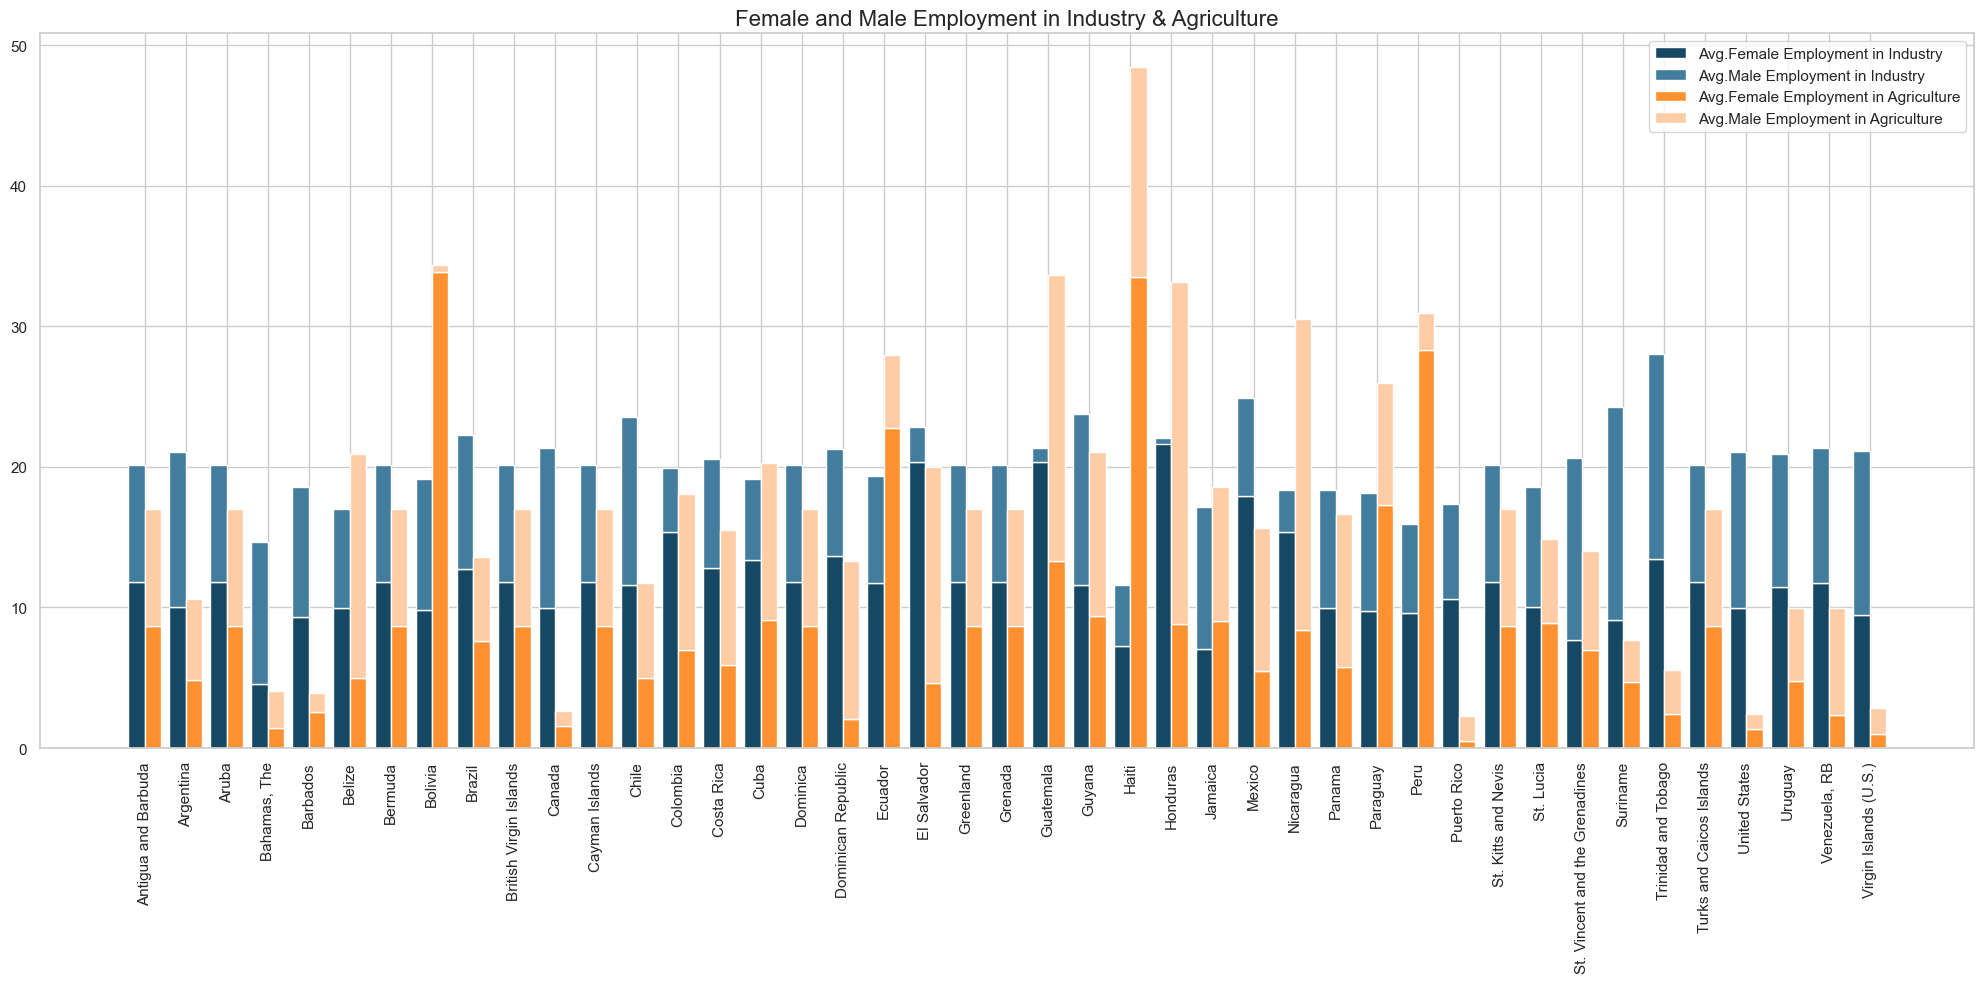

In [21]:
employment_df = pd.DataFrame()

employment_df["Avg.Employment in Industry"] = cleaned_df.groupby("Country")['Employment in Industry(%)'].mean()
employment_df["Avg.Employment in Agriculture"] = cleaned_df.groupby("Country")['Employment in Agriculture(%)'].mean()
employment_df["Avg.Female Employment in Industry"] = cleaned_df.groupby("Country")['Female Employment in Industry(%)'].mean()
employment_df["Avg.Female Employment in Agriculture"] = cleaned_df.groupby("Country")['Female Employment in Agriculture(%)'].mean()
employment_df["Country"] = employment_df.index
employment_df.reset_index(drop=True, inplace=True)
employment_df
width = 0.4
plt.figure(figsize=(20,10))

plt.bar(employment_df.index, employment_df["Avg.Female Employment in Industry"], label='Avg.Female Employment in Industry',width=width,align='center',color = '#164863')
plt.bar(employment_df.index, employment_df["Avg.Employment in Industry"]-employment_df["Avg.Female Employment in Industry"], label='Avg.Male Employment in Industry', bottom=employment_df["Avg.Female Employment in Industry"],width=width,align='center',color = '#427D9D')

plt.bar(employment_df.index+width, employment_df["Avg.Female Employment in Agriculture"], label='Avg.Female Employment in Agriculture',width=width,align='center',color = '#FF9130')
plt.bar(employment_df.index+width, employment_df["Avg.Employment in Agriculture"]-employment_df["Avg.Female Employment in Agriculture"], label='Avg.Male Employment in Agriculture', bottom= employment_df["Avg.Female Employment in Agriculture"],width=width,align='center',color = '#FECDA6')

plt.title('Female and Male Employment in Industry & Agriculture', fontsize=16)
plt.xticks(rotation =90)
# Display the figure
plt.xticks(employment_df.index + width / 2, employment_df['Country'])
plt.tight_layout()
plt.legend()
plt.show()


**Result: As you can see in agriculture countries, female employment is larger than male. but in industry countries, female employment is smaller than that of male. Especially developed countries invest much more in Industry than Agriculture such as United States, Brazil, Canada.**

## Making your own question 05? (1.5 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:**  Are there any trends in school enrollment at the primary and tertiary levels over time?


**Answering this question will**: help us gain insights into how school enrollment rates at the primary and tertiary levels have evolved over time. It can provide information about the progress in education access and the relative emphasis on primary and tertiary education in various countries. Additionally, it may reveal trends in educational attainment and policy priorities.

**How we answer this question**: We will consider the primary and tertiary school enrollment over years in many countries

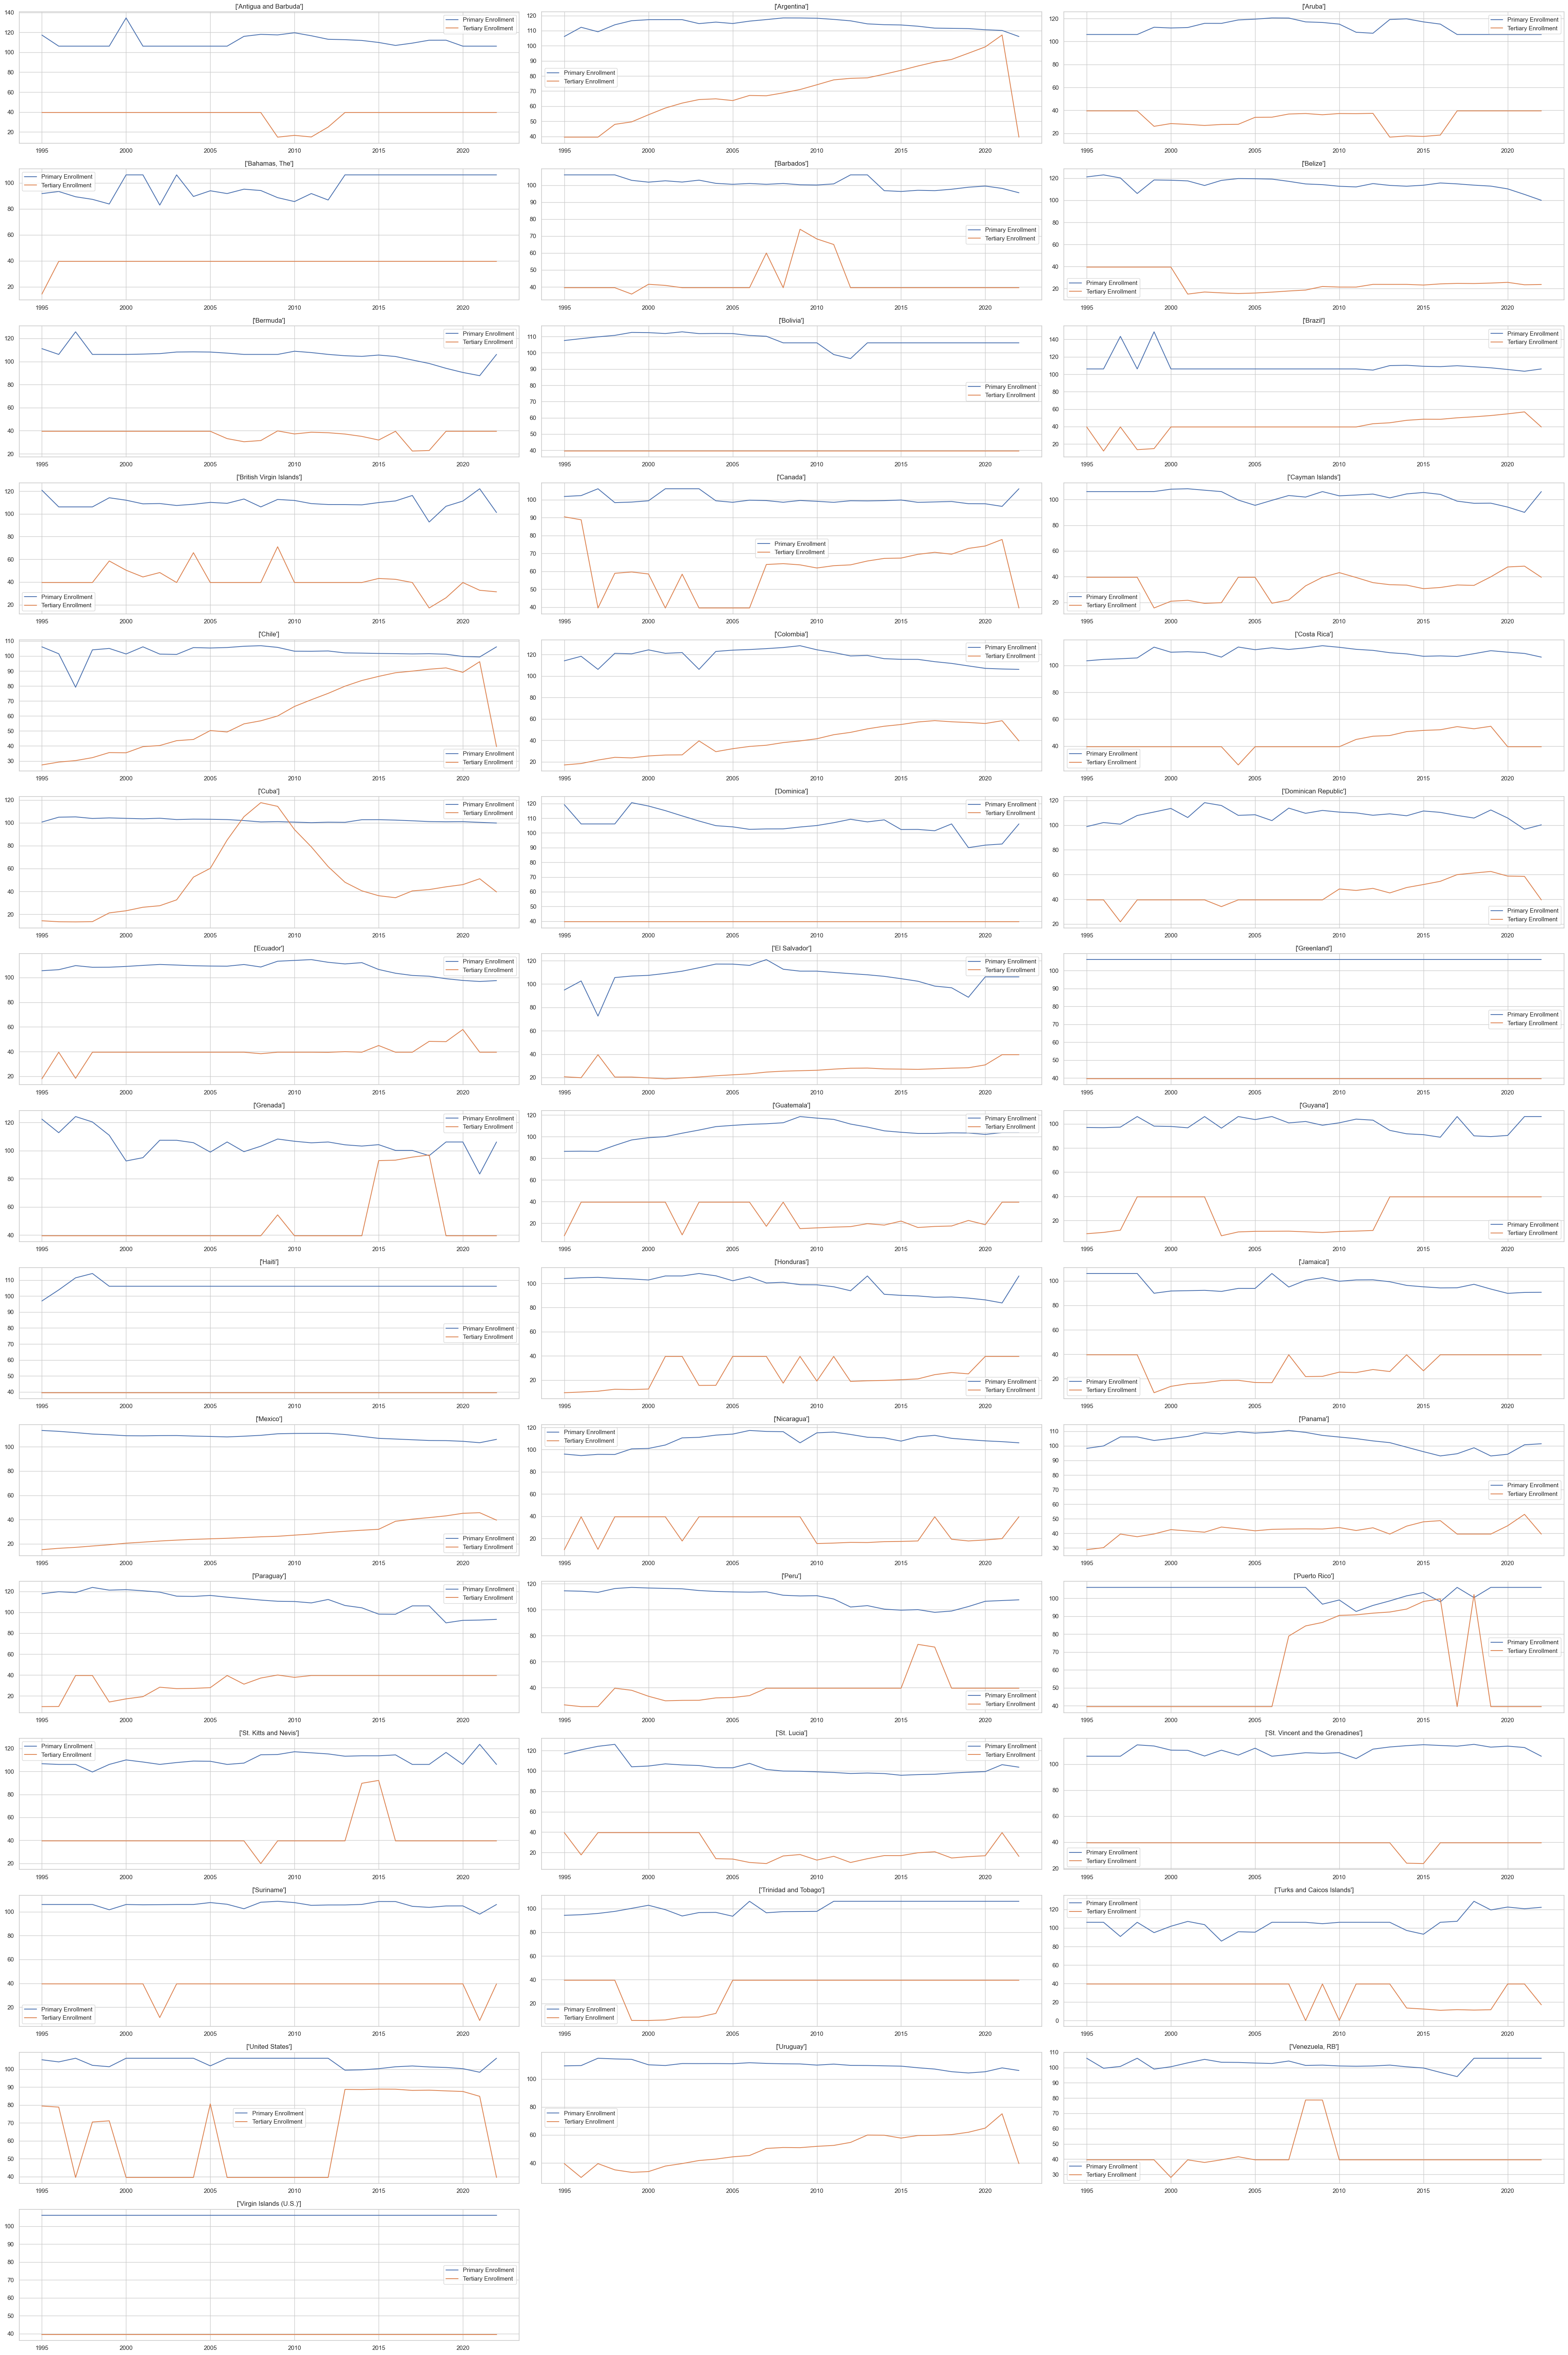

In [22]:
SchoolEnrollment = pd.DataFrame()
cleaned_df
SchoolEnrollment["Primary Enrollment"] = cleaned_df['School enrollment, primary']
SchoolEnrollment["Tertiary Enrollment"] = cleaned_df['School enrollment, tertiary']
SchoolEnrollment["Country"] = cleaned_df["Country"]
SchoolEnrollment["Year"] = cleaned_df["Year"]
#SchoolEnrollment[:28]
SchoolEnrollment[28+28+28:28+28+28+28]
len(SchoolEnrollment["Country"].unique())
nrows = 15
ncols = 3

# SchoolEnrollmentCountries = SchoolEnrollment[28:28+28]
# plt.figure(figsize=(20,10))
# plt.plot(SchoolEnrollmentCountries["Year"],SchoolEnrollmentCountries["Primary Enrollment"])
# plt.plot(SchoolEnrollmentCountries["Year"],SchoolEnrollmentCountries["Tertiary Enrollment"])
# plt.title(SchoolEnrollmentCountries["Country"].unique())
# plt.legend()
# plt.show()
row = 0
fig, ax = plt.subplots(nrows,ncols,figsize = (40,60))
for r in range(0,nrows):
    for c in range(0,ncols):
        i = r*ncols+c
        ax_i = ax[r,c]
        SchoolEnrollmentCountries = SchoolEnrollment[row:row+28]
        row+=28
        ax_i.plot(SchoolEnrollmentCountries["Year"],SchoolEnrollmentCountries["Primary Enrollment"],label = "Primary Enrollment")
        ax_i.plot(SchoolEnrollmentCountries["Year"],SchoolEnrollmentCountries["Tertiary Enrollment"],label = "Tertiary Enrollment")
        ax_i.set_title(SchoolEnrollmentCountries["Country"].unique())
        ax_i.legend()

ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)
plt.tight_layout()
plt.show()

# width = 0.4
# plt.figure(figsize=(20,10))

# plt.bar(employment_df.index, employment_df["Avg.Female Employment in Industry"], label='Avg.Female Employment in Industry',width=width,align='center',color = '#164863')
# plt.bar(employment_df.index, employment_df["Avg.Employment in Industry"]-employment_df["Avg.Female Employment in Industry"], label='Avg.Male Employment in Industry', bottom=employment_df["Avg.Female Employment in Industry"],width=width,align='center',color = '#427D9D')

# plt.bar(employment_df.index+width, employment_df["Avg.Female Employment in Agriculture"], label='Avg.Female Employment in Agriculture',width=width,align='center',color = '#FF9130')
# plt.bar(employment_df.index+width, employment_df["Avg.Employment in Agriculture"]-employment_df["Avg.Female Employment in Agriculture"], label='Avg.Male Employment in Agriculture', bottom= employment_df["Avg.Female Employment in Agriculture"],width=width,align='center',color = '#FECDA6')

# plt.title('Female and Male Employment in Industry & Agriculture', fontsize=16)
# plt.xticks(rotation =90)
# # Display the figure
# plt.xticks(employment_df.index + width / 2, employment_df['Country'])
# plt.tight_layout()
# plt.legend()
# plt.show()


**Result: Following the onset of the COVID-19 pandemic, numerous countries experienced a substantial decline in tertiary enrollment after 2020, with developed nations like Canada, the United States, and Chile being particularly affected. Furthermore, primary enrollment consistently exceeded tertiary enrollment, as many countries implemented policies requiring children to complete primary school.**

## Making your own question 06? (1.5 points)

After exploring the data, we have a better understanding of the data. Now let's see what questions can be answered with this data.

**A possible question is:**  What is the country with highest GDP?

**Answering this question will**: provide information about the country with the highest Gross Domestic Product (GDP). GDP is a crucial economic indicator that reflects the total economic output of a country. Identifying the country with the highest GDP can offer insights into the economic strength and significance of that nation on the global stage.

**How we answer this question**: We will consider the avg GDP over years in many countries

In [23]:
# Create a new dataframe
avg_birthrate_df = pd.DataFrame()

# YOUR CODE HERE

# Find average for each country
avg_birthrate_df["Avg.Birth Rate"] = cleaned_df.groupby("Country")["Birth Rate"].mean()

# Set the index as a column - countries
avg_birthrate_df["Country"] = avg_birthrate_df.index

# Drop the index
avg_birthrate_df.reset_index(drop=True, inplace=True)

# Sort the rows based of Average Birth Rate
avg_birthrate_df.sort_values("Avg.Birth Rate", inplace=True, ascending=False)

# Display
avg_birthrate_df

,Avg.Birth Rate,Country
22,28.940357,Guatemala
24,27.961714,Haiti
25,27.421750,Honduras
7,26.289464,Bolivia
5,24.881107,Belize
28,24.790643,Nicaragua
30,24.082678,Paraguay
23,22.955464,Guyana
17,22.260000,Dominican Republic
18,21.991000,Ecuador


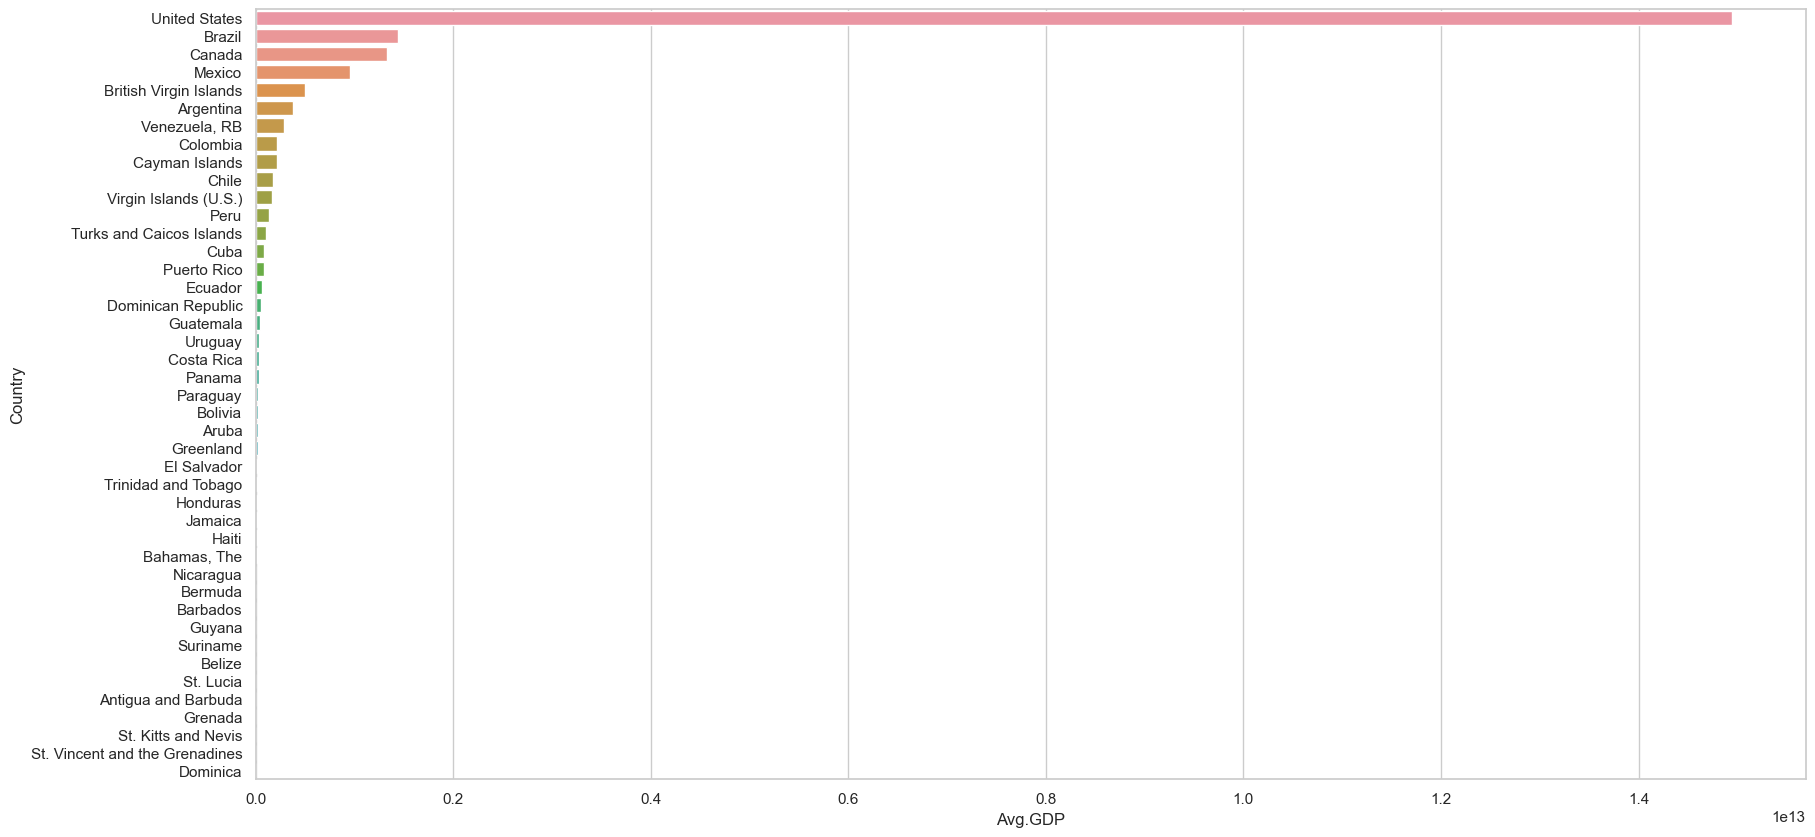

In [24]:

avg_GDP = pd.DataFrame()
# YOUR CODE HERE
avg_GDP["Avg.GDP"] = cleaned_df.groupby("Country")["GDP in USD"].mean()
avg_GDP["Country"] = avg_GDP.index
avg_GDP.reset_index(drop=True, inplace=True)
avg_GDP.sort_values("Avg.GDP", inplace=True, ascending=False)
avg_GDP

# Plotting for top countries
# YOUR CODE HERE
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(data=avg_GDP, y="Country", x= "Avg.GDP")

As we can see, we can hardly to compare the average GDP in small countries. So I decide to seperate countries with small GDP into 1 group and others into 1 group

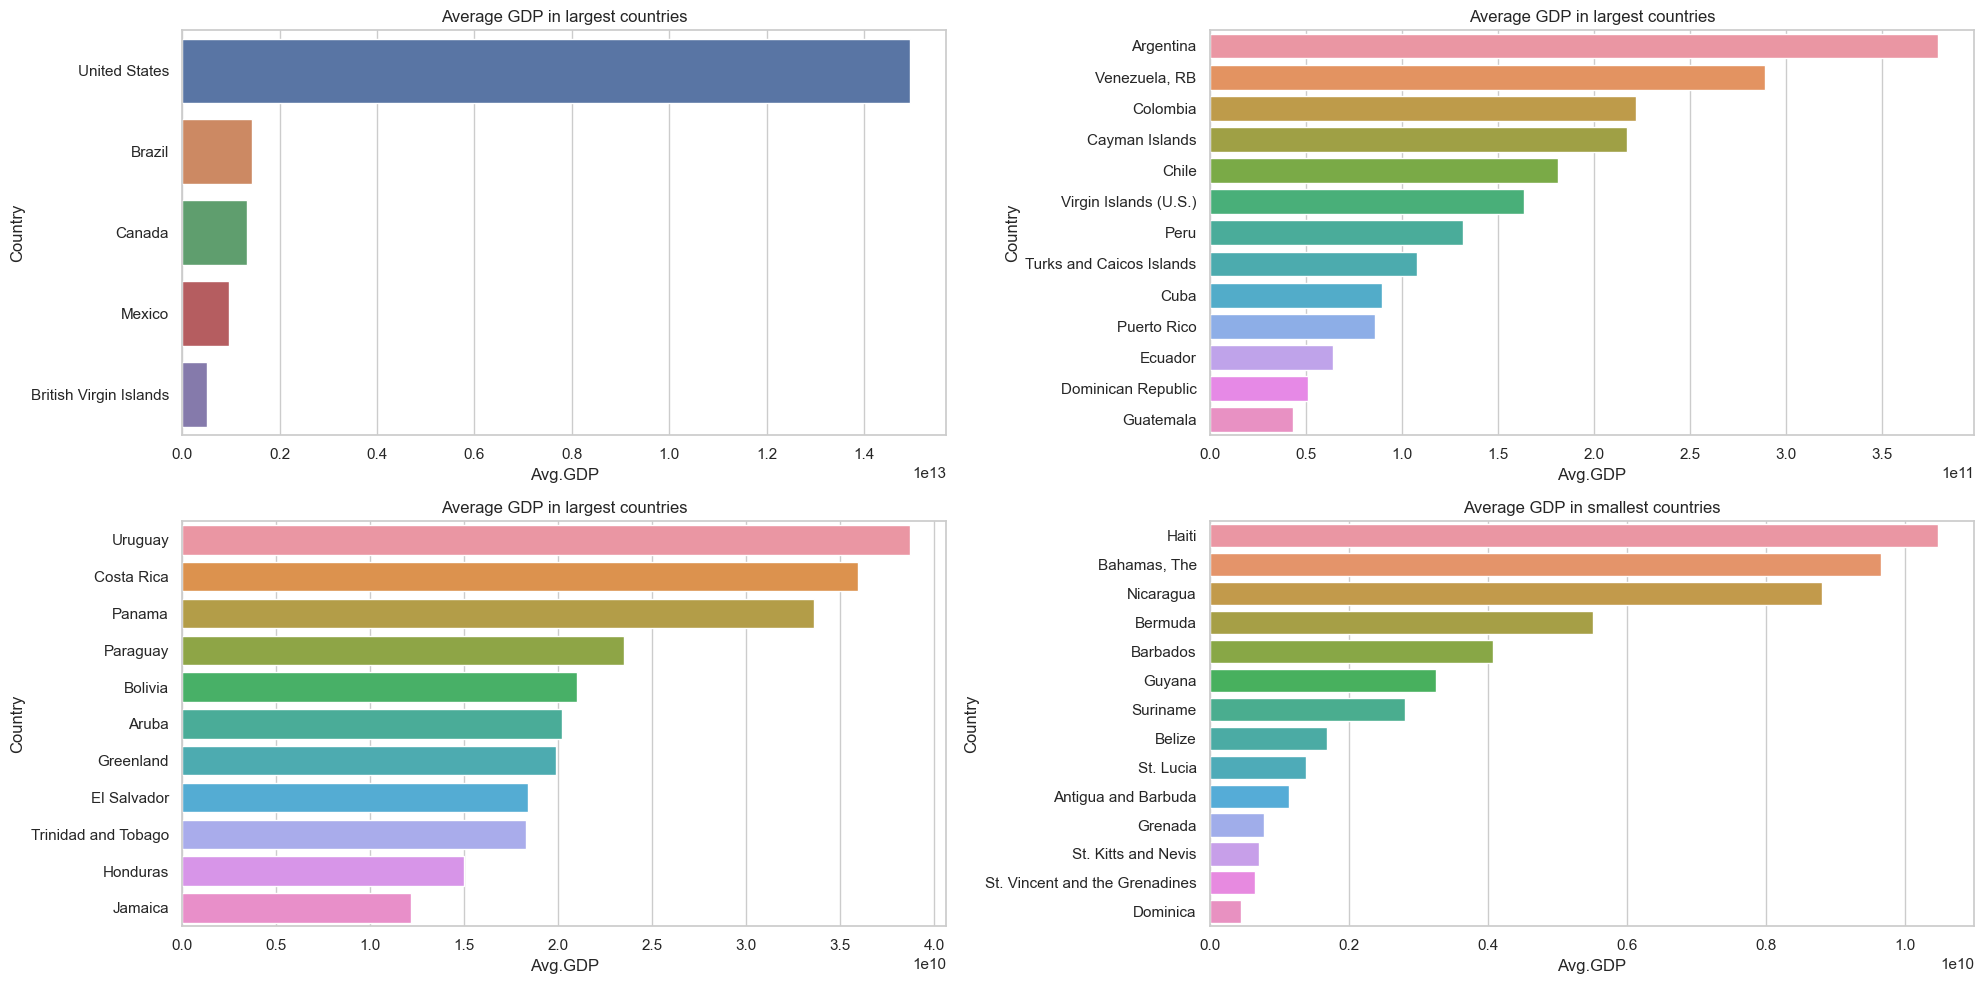

In [25]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))
avg_GDP = pd.DataFrame()
# YOUR CODE HERE
avg_GDP["Avg.GDP"] = cleaned_df.groupby("Country")["GDP in USD"].mean()
avg_GDP["Country"] = avg_GDP.index
# avg_GDP.reset_index(drop=True, inplace=True)
avg_GDP.sort_values("Avg.GDP", inplace=True, ascending=False)

# avg_GDP
sns.set(style="whitegrid")
sns.barplot(data=avg_GDP[:"British Virgin Islands"], y="Country", x="Avg.GDP", ax=ax1)
ax1.set_title("Average GDP in largest countries")

sns.set(style="whitegrid")
sns.barplot(data=avg_GDP["Argentina":"Guatemala"], y="Country", x="Avg.GDP", ax=ax2)
ax2.set_title("Average GDP in largest countries")


sns.set(style="whitegrid")
sns.barplot(data=avg_GDP["Uruguay":"Jamaica"], y="Country", x="Avg.GDP", ax=ax3)
ax3.set_title("Average GDP in largest countries")

sns.set(style="whitegrid")
sns.barplot(data=avg_GDP["Haiti":], y="Country", x="Avg.GDP", ax=ax4)
ax4.set_title("Average GDP in smallest countries")

# Display the figure
plt.tight_layout()
plt.show()


**Result: As u can see, top 4 GDP in continent of americas are United States, Brazil, Canada, Mexico, British Virgin Islands. Dominica is the lowest GDP country**